In [1]:
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model,load_model
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\saxon\.conda\envs\tenserflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\saxon\.conda\envs\tenserflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\saxon\.conda\envs\tenserflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\saxon\.conda\envs\tenserflow\lib

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = './chest_xray/train'
valid_path = './chest_xray/test'

In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:
folders = glob('./chest_xray/train/*')

In [7]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [24]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [25]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('./chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [27]:
test_set = test_datagen.flow_from_directory('./chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [28]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
163/163 [==============================] - 1157s 7s/step - loss: 0.1910 - acc: 0.9235 - val_loss: 0.2682 - val_acc: 0.9103
Epoch 2/5
163/163 [==============================] - 952s 6s/step - loss: 0.1031 - acc: 0.9617 - val_loss: 0.2469 - val_acc: 0.9151
Epoch 3/5
163/163 [==============================] - 912s 6s/step - loss: 0.0970 - acc: 0.9643 - val_loss: 0.2366 - val_acc: 0.9183
Epoch 4/5
163/163 [==============================] - 878s 5s/step - loss: 0.0783 - acc: 0.9699 - val_loss: 0.3061 - val_acc: 0.9151
Epoch 5/5
163/163 [==============================] - 852s 5s/step - loss: 0.0918 - acc: 0.9643 - val_loss: 0.2651 - val_acc: 0.9215


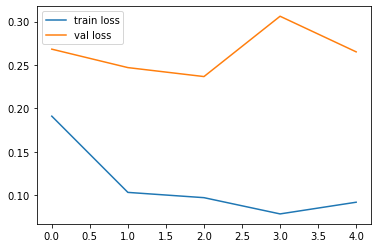

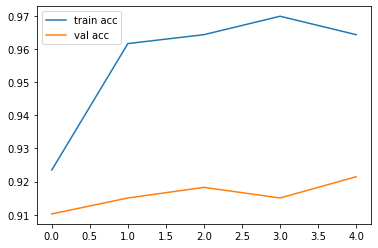

<Figure size 432x288 with 0 Axes>

In [29]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
model.save('final_model.h5')

In [38]:
model=load_model("./final_model.h5")
img=image.load_img("C:\\Users\\saxon\\Videos\\Lung Diseases\\chest_xray\\val\\NORMAL\\NORMAL2-IM-1427-0001.jpeg",target_size=(224,224))
imgf=image.img_to_array(img)
imgf=np.expand_dims(imgf,axis=0)
imgf_dataf=preprocess_input(imgf)
classes=model.predict(imgf_dataf)

In [39]:
classes

array([[1., 0.]], dtype=float32)